
# For Today!


conda update -f -c conda-forge keras tensorflow protobuf

OR 

pip install tensorflow
pip install keras

(it will take a little while to download and install)

### A few notes:

1) No PS6; work on your final projects!
2) For PS5, don't get too concerned if your algorithm for blended objects doesn't actually work very well. It is the thought that counts!

### Final Project Advice/Guidelines

1) Final projects should include the following:

* An introduction which explains the motivation for your project, briefly describes the methods/data you plan to use, and includes relevant references (i.e. links).
* An analysis section
* A conclusion which describes the main results from the analysis and possible extensions.

2) Throughout the work you should describe what you are doing with full text blocks (i.e. "Markdown" blocks like this one). Include relevant pictures and figures. 

3) Describe things like I don't anything about statistics/programming/machine learning. If you use a given algorithm (like k-means, gaussian mixtures, etc.) you should briefly describe what it is doing and WHY you are using it or WHY it might be appropriate for your application.

4) Put inline comments in your code to describe what you are doing.

5) All analysis/code/text should be in an jupyter notebook; if there is some reason you have a seperate file (i.e. a .py file or something else) send me an email beforehand.

6) All Final Projects must be submitted online here: https://classroom.github.com/a/aMBHHi1_

7) Final projects are due the last day of class. Due to deadlines for me submitting grades, no extensions will be allowed!

8) For the specific rubric see here: https://bhorowitz.github.io/FinalProjectDescription.pdf

# Neural Networks

Adapted from Josh Bloom

## Deep Learning


### What is DL?

   - A set of methodologies for doing machine learning
   - Collection/composition of simple mathematical functions whose parameterization is *learned* by passing over the data
   - Modern version of "artificial neural networks"
   
### Why do people like it?
   - It's "inspired" by how the brain is thought to work, so it *feels* like a natural approach. 
   - It works. Amazingly well. In a growing number of use cases.
   - It's composeable, so it's "easy" to understand each piece.
   - Featurizes + learns on "raw" data.
   - Timely: It's tractable with the data/problems we have and the compute power we have access to.
   - New shiny object with codebases getting commoditized (read: easier and easier to use...and free).

### Why do people dislike it?
   - Decades of hype
   - It's considered a black box in a lot of ways
   - It can take a ninja to get it right
   - It's expensive to run/learn a model
   - Not natively adapted to heterogenous data and certain types of learning
   - Not the approach of choice for small/medium data

## The "Neuron" ("Perceptron")

A simple diagram
![](https://miro.medium.com/max/1302/1*UA30b0mJUPYoPvN8yJr2iQ.jpeg)
The key is to *learn* the weights $w_i$ given the data. This is done as such:

  1. Initialization:
      - Set the transfer (e.g. sum) & activation (sigmoid) functions you want to use.
      - randomly assign the weights (with some probability distribution)
  2. For each instance $i$, run your input $\vec x_i$ through the network with current weights to get the current output.
  3. Determine $\Delta$ how far off the current output is from the true output/labels.
  4. Update the weights by taking the gradient of the activation at $\vec x_i$ and multiplying by $\Delta$.
  5. Repeat steps 2--5 until you hit a stopping criteria.
  
This process is an optimization and is called **"Back Propogation"** and, if your activation function is differentiable, it's basically a form of gradient descent and reduces to doing simple linear algebra to find the optimimal weights given the data.  It was first presented by Rumelhart, Hinton, Williams ([Nature, 1986](http://www.iro.umontreal.ca/~pift6266/A06/refs/backprop_old.pdf))

In [57]:
import numpy as np


X = np.linspace(0,1,6).reshape(6,1)
Y = -2*X

In [58]:
weights_initial = 2*np.random.random((1,1)) - 1


In [77]:
def transfer(wx):
    " how to aggregate the weighted inputs "
    return np.sum(wx,axis=1)

def activation(twx,func="ReLU",derivative=False):
    " how to treat the sum of the weighted input "
    if func == "ReLU":
        if derivative:
            return np.array([0 if x <= 0 else 1 for x in twx])
        return np.array([max(0,x) for x in twx])
    
    if func == "sigmoid":
        if derivative:
            return np.array([x*(1-x) for x in twx])
        return np.array([1/(1+np.exp(-x)) for x in twx])
    
    if func == "tanh":
        if derivative:
            return np.array([1 - (np.tanh(x))**2 for x in twx])
        return np.array([np.tanh(x) for x in twx])
    if func == "lin":
        if derivative:
           # print("yo")
            return np.array([1 for x in twx])
        return np.array([x for x in twx])
    raise

In [80]:
rms_error = {"lin": []}

for func in ["lin"]:

    weights = weights_initial.copy()

    for _ in range(10):
        # forward propagation
        layer0 = X
        sum_of_weighted_X = transfer(layer0*weights.T)
        layer1 = activation(sum_of_weighted_X,func=func)

       # print(layer1)
        # how much did we miss?
        layer1_error = Y.T - layer1
        #print(layer1_error)

        rms_error[func].append(np.sqrt((layer1_error**2).sum()))
        # multiply how much we missed by the
        # slope of the activation at the values in layer1
        layer1_delta = layer1_error * activation(layer1,derivative=True)
        print(weights, activation(layer1,derivative=True))
        weights += np.dot(layer1_delta,layer0).T

[[0.32700354]] [0 1 1 1 1 1]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]
[[-4.79240425]] [0 0 0 0 0 0]


In [70]:
weights

array([[-4.79240425]])

# A simple example

In [81]:
import numpy as np
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

# output label
Y = np.array([[0,0,1,1]]).T

In [82]:
np.random.seed(42)
weights_initial = 2*np.random.random((3,1)) - 1


In [83]:
rms_error = {"tanh": [], "sigmoid": []}

for func in ["tanh", "sigmoid"]:

    weights = weights_initial.copy()

    for _ in range(10000):
        # forward propagation
        layer0 = X
        sum_of_weighted_X = transfer(layer0*weights.T)
        layer1 = activation(sum_of_weighted_X,func=func)

        # how much did we miss?
        layer1_error = Y.T - layer1

        rms_error[func].append(np.sqrt((layer1_error**2).sum()))
        # multiply how much we missed by the
        # slope of the activation at the values in layer1
        layer1_delta = layer1_error * activation(layer1,derivative=True)

        weights += np.dot(layer1_delta,layer0).T

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5, 1.0, 'Single Layer NN')

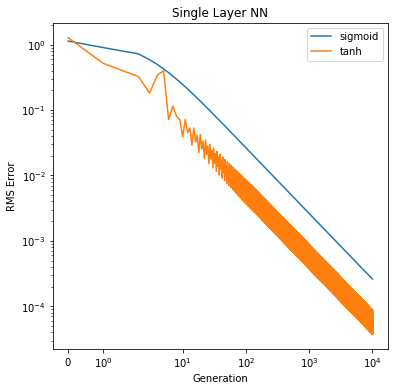

In [84]:
%pylab inline 

plt.figure(figsize=(6,6))

plt.plot(rms_error["sigmoid"],label="sigmoid")
plt.plot(rms_error["tanh"],label="tanh")

plt.xscale("symlog")
plt.yscale("log")
plt.ylabel("RMS Error")
plt.xlabel("Generation")
plt.legend()
plt.title("Single Layer NN")

Note we updated the weights at each pass by using all the instances (this is called "batch learning"). There are speed ups (but generally noisier learning) by randomly choosing a subset of the data at each iteration ("stochastic learning").

See [LeCun, Bottou, Orr, & Muller 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf) for more info.

## Multi-Layer Networks

Multilayer networks are not really any different. They have more weights to learn but they may also represent more complex models. Backpropogation optimization still works, this time by using the chain rule. That is, optimization is multi-step but it's  local to individual layers (this makes the problem tractable).

<img src="http://scikit-learn.org/stable/_images/multilayerperceptron_network.png" width="50%">

The above network is said to have a hidden layer, which is neither an input nor an output layer.

In sklearn there are a few solver for backpropogation optimization:
  - ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
  - ‘sgd’ refers to stochastic gradient descent.
  - ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [32]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',activation="tanh",
                    hidden_layer_sizes=(5,2), random_state=1)

In [33]:
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

# output label
Y = np.array([0,0,1,1])

In [34]:
clf.fit(X, Y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
print("Iterations:", clf.n_iter_)

Iterations: 14


In [36]:
clf.predict(np.array([1,0,1]).reshape(1, -1))

array([1])

# Deep Learning Frameworks

sklearn isn't designed for complex networks, either in terms of complexity of individual elements or overall depth. Almost all frameworks written in low-level C++/C with Python (or other scripting bindings). Eventually, for complex enough models, one will want dedicated hardware (usually GPUs) to perform the calculations.

### Low-level frameworks

   - Tensorflow (Google) Nov 2015
   - Theano
   - Caffe (Berkeley)
   - Torch (Lua)
   - pytorch (Python)
   - CNTK (Microsoft)
   - Chainer
   - PaddlePaddle (Baidu) Aug 2016
   
### High level frameworks (Python)

   - Keras (atop Tensorflow, Theano)
   - TFLearn 
   - nolearn
   - SkFlow (part of tensorflow)
   - [Lasagne](http://lasagne.readthedocs.io/en/latest/index.html) (atop Theano)
   
<img src="https://pbs.twimg.com/media/DX0lfBNU8AEs8KG.png:large" width="75%">
Source: https://twitter.com/fchollet/status/971863128341323776

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">TensorFlow is the platform of choice for deep learning in the research community. These are deep learning framework mentions on arXiv over the past 3 months <img src="https://pbs.twimg.com/media/DXy_uc0VAAAIhKG.jpg:small">

&mdash; François Chollet (@fchollet) <a href="https://twitter.com/fchollet/status/971863128341323776?ref_src=twsrc%5Etfw">March 8, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


see also: https://github.com/mbadry1/Top-Deep-Learning

# Keras

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler  


cal_house = datasets.california_housing
cal_data = cal_house.fetch_california_housing()
X = cal_data['data']   # 8 features 
Y = cal_data['target'] # response (median house price)

half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]


scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test data
test_X = scaler.transform(test_X)

In [2]:
num_input_features = train_X.shape[1]
print(f'number of input features = {num_input_features}')

number of input features = 8


In [5]:
import datetime, os

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf

# Print keras version
print(tensorflow.keras.__version__)

2.2.4-tf


In [6]:
def nn_clf():
    
    model = Sequential()
    model.add(Dense(10, input_shape=(num_input_features,), 
                      activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(10,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(5,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])
    return model

In [7]:
model = nn_clf()

model.summary()

W0809 08:35:00.357289 4579542464 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


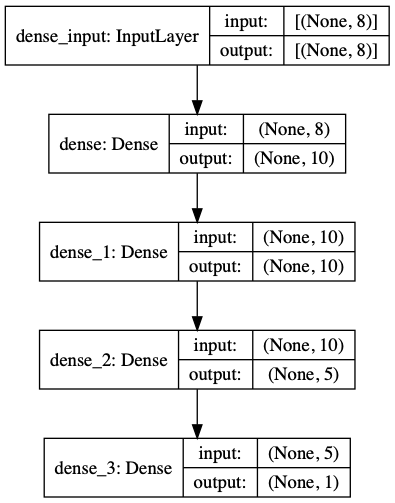

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image("model_plot.png")

In [9]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

clf = KerasRegressor(build_fn=nn_clf, batch_size=32, epochs=50)
clf.fit(train_X, train_Y)

Using TensorFlow backend.


Epoch 1/50
10320/10320 [==============================] - 1s 70us/sample - loss: 2.1594 - mean_absolute_error: 1.0564 - mean_squared_error: 2.1594
Epoch 2/50
10320/10320 [==============================] - 0s 42us/sample - loss: 0.5034 - mean_absolute_error: 0.5152 - mean_squared_error: 0.5034
Epoch 3/50
10320/10320 [==============================] - 0s 48us/sample - loss: 0.4162 - mean_absolute_error: 0.4623 - mean_squared_error: 0.4162
Epoch 4/50
10320/10320 [==============================] - 0s 47us/sample - loss: 0.3907 - mean_absolute_error: 0.4470 - mean_squared_error: 0.3907
Epoch 5/50
10320/10320 [==============================] - 0s 47us/sample - loss: 0.3832 - mean_absolute_error: 0.4422 - mean_squared_error: 0.3832
Epoch 6/50
10320/10320 [==============================] - 0s 44us/sample - loss: 0.3756 - mean_absolute_error: 0.4381 - mean_squared_error: 0.3756
Epoch 7/50
10320/10320 [==============================] - 0s 45us/sample - loss: 0.3713 - mean_absolute_error: 0.4356 

MSE 0.6046936971808399


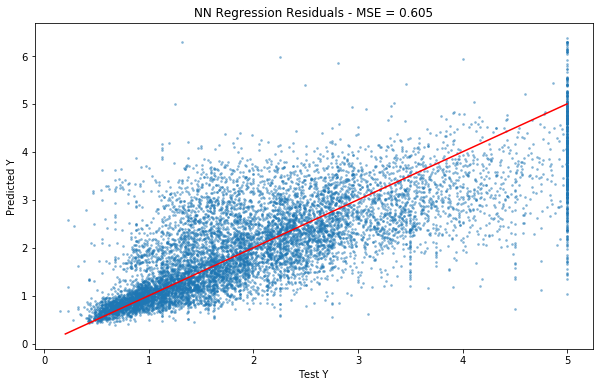

In [10]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y, clf.predict(test_X)) ; print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_Y,clf.predict(test_X),alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

### Classification with Keras

We will now try to perform a classification analysis rather than regression analysis.

In [1]:
import datetime, os

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf

# Print keras version
print(tensorflow.keras.__version__)

2.2.4-tf


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist #will need to download it!


In [4]:

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # scale the images to 0-1

In [5]:
x_train.shape

(60000, 28, 28)

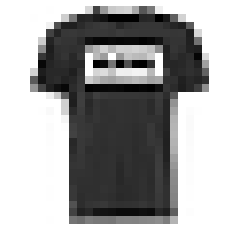

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

ind = 1
plt.axis('off')
plt.imshow(x_train[ind], cmap=plt.cm.gray_r, interpolation='nearest')

In [7]:
input_shape = x_train[0].shape
input_shape

(28, 28)

In [8]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation='softmax'))

W0809 08:49:56.548761 4600743360 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
# define path to save model
model_path = f'nn_results/colombia_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

logdir = os.path.join("nn_results", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.75,
                              patience=2, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = tf.keras.callbacks.CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0.001, 
                                             patience=3, \
                                             verbose=1, mode='auto')

model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=20, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback, reduce_lr, csv_logger, earlystop, model_check])

Training ... nn_results/colombia_nn_2019-08-09T15:49.h5
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59456/60000 [============================>.] - ETA: 0s - loss: 0.5081 - acc: 0.8214

W0809 08:50:12.169016 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 14s 227us/sample - loss: 0.5071 - acc: 0.8216 - val_loss: 0.4225 - val_acc: 0.8464
Epoch 2/20
59744/60000 [============================>.] - ETA: 0s - loss: 0.3696 - acc: 0.8651

W0809 08:50:27.715386 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 16s 259us/sample - loss: 0.3697 - acc: 0.8650 - val_loss: 0.3874 - val_acc: 0.8618
Epoch 3/20
59776/60000 [============================>.] - ETA: 0s - loss: 0.3299 - acc: 0.8781

W0809 08:50:42.180519 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 14s 241us/sample - loss: 0.3300 - acc: 0.8780 - val_loss: 0.3988 - val_acc: 0.8516
Epoch 4/20
59680/60000 [============================>.] - ETA: 0s - loss: 0.3032 - acc: 0.8880

W0809 08:50:57.731450 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 16s 259us/sample - loss: 0.3032 - acc: 0.8880 - val_loss: 0.3590 - val_acc: 0.8732
Epoch 5/20
59744/60000 [============================>.] - ETA: 0s - loss: 0.2844 - acc: 0.8949

W0809 08:51:13.021316 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 15s 255us/sample - loss: 0.2847 - acc: 0.8949 - val_loss: 0.3306 - val_acc: 0.8831
Epoch 6/20
59776/60000 [============================>.] - ETA: 0s - loss: 0.2718 - acc: 0.8992

W0809 08:51:28.112488 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 15s 251us/sample - loss: 0.2721 - acc: 0.8991 - val_loss: 0.3279 - val_acc: 0.8832
Epoch 7/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2579 - acc: 0.9043

W0809 08:51:43.525933 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 15s 257us/sample - loss: 0.2578 - acc: 0.9043 - val_loss: 0.3391 - val_acc: 0.8840
Epoch 8/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2457 - acc: 0.9081

W0809 08:51:58.219008 4600743360 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


60000/60000 [==============================] - 15s 245us/sample - loss: 0.2457 - acc: 0.9081 - val_loss: 0.3552 - val_acc: 0.8781
Epoch 00008: early stopping


## Overfitting!

You'll notice above that the accuracy is much higher than the val_accuracy. That is, we overfit on the training data. 

In [41]:
y_predict = model.predict_classes(x_train)

In [43]:
from sklearn.metrics import accuracy_score
y_predict = model.predict_classes(x_train)
print("training data: ", accuracy_score(y_predict, y_train))


y_predict = model.predict_classes(x_test)
print("training data: ", accuracy_score(y_predict, y_test))

training data:  0.91485
training data:  0.8796


One way to help protect against this is to introduce `Dropout`

<img src="https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png">

Srivastava, Nitish, et al. ”Dropout: a simple way to prevent neural networks from
overfitting”, JMLR 2014

In [44]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))  # 20% chance of dropping a node during training
model.add(Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
# define path to save model
model_path = f'nn_results/colombia_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

logdir = os.path.join("nn_results", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.75,
                              patience=2, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = tf.keras.callbacks.CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0.001, 
                                             patience=3, \
                                             verbose=1, mode='auto')

model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=20, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback, reduce_lr, csv_logger, earlystop, model_check])

Training ... nn_results/colombia_nn_2019-08-09T15:48.h5
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59808/60000 [============================>.] - ETA: 0s - loss: 0.3628 - acc: 0.8700

InvalidArgumentError: You must feed a value for placeholder tensor 'flatten_input' with dtype float and shape [?,28,28]
	 [[{{node flatten_input}}]]

In [12]:
y_pred = model.predict_classes(x_test)


Text(0.5, -3.5, 'Predicted label')

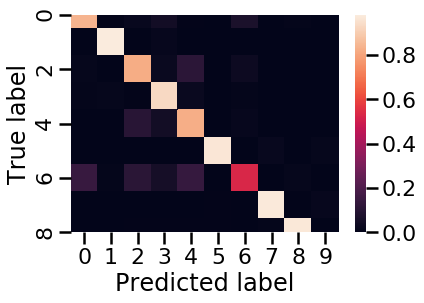

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.set_context("poster")
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

Populating the interactive namespace from numpy and matplotlib


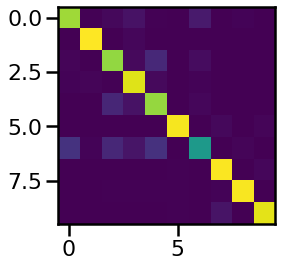

In [22]:
%pylab inline
imshow(conf_mat)

In [14]:
lookup = {0: "T-shirt/top",
          1: "Trouser",
          2: "Pullover",
          3: "Dress",
          4: "Coat",
          5: "Sandal",
          6: "Shirt",
          7: "Sneaker",
          8: "Bag",
          9: "Ankle boot"}

In [15]:
ind_wrong = []
for i, (pred, actual) in enumerate(zip(model.predict_classes(x_test),y_test)):
    if pred != actual:
        ind_wrong.append((i,pred, actual))

Text(0.5, 1.0, 'pred=Sandal true=Ankle boot')

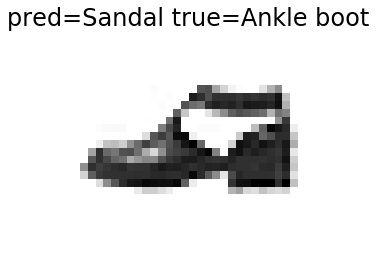

In [19]:
ind = 2
plt.imshow(x_test[ind_wrong[ind][0]], cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis("off")
plt.title(f"pred={lookup[ind_wrong[ind][1]]} true={lookup[ind_wrong[ind][2]]}")